In [3]:
%matplotlib inline

from __future__ import division

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

import matplotlib.colors as colors
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

In [229]:
log_path = "logs_635769532000045260"

In [230]:
duration = 100
start = 100
end = 300

# Input

In [231]:
df = pd.read_csv("%s/input.csv" % log_path, header=None)
dfs = df.gt(0).applymap(lambda x: 1.0 if x else None)

ValueError: No columns to parse from file

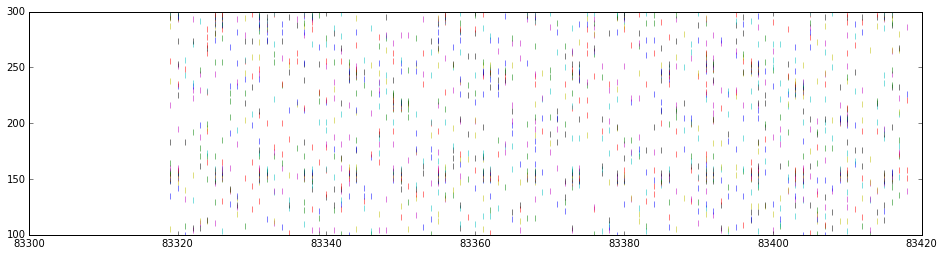

In [232]:
plt.figure(figsize=(16, 4))
for i in dfs.columns[start:end]:
    x = dfs.index[-duration:]
    y = (dfs[i] * i)[-duration:]
    s = dfs[i][:duration].sum()
    plt.plot(x, y, "|")

# Output

In [233]:
df = pd.read_csv("%s/output.csv" % log_path, header=None)
dfs = df.gt(0).applymap(lambda x: 1.0 if x else None)

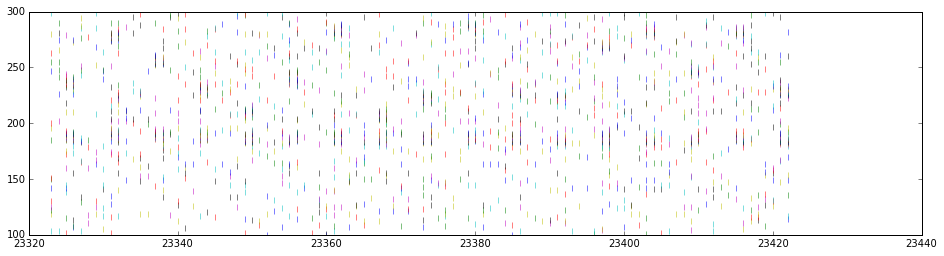

In [234]:
plt.figure(figsize=(16, 4))
for i in dfs.columns[start:end]:
    x = dfs.index[-duration:]
    y = (dfs[i] * i)[-duration:]
    s = dfs[i][:duration].sum()
    plt.plot(x, y, "|")

# Weights

In [261]:
df = pd.read_csv("%s/weights.csv" % log_path, header=None)

In [236]:
w = df.values[-1]

<matplotlib.colorbar.Colorbar instance at 0x11370a710>

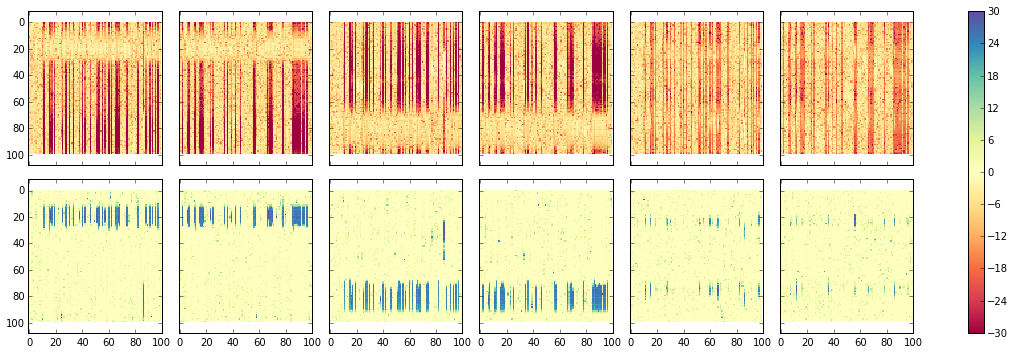

In [260]:
# there are 60,000 synapses total
# 10,000 for each input layer, going to each output layer (x2)
# of those 10,000 are 100 outgoing from each input neuron

layer_count = 12
input_layer_size = 100
output_layer_size = 100
layer_size = input_layer_size * output_layer_size
input_layer_count = 6
output_layer_count = 2

fig, axs = plt.subplots(output_layer_count, input_layer_count, sharex=True, sharey=True, figsize=(16, 5))
norm = colors.Normalize(vmin=-30, vmax=30)

for i in xrange(input_layer_count): # iterate input layers
    for j in xrange(output_layer_count):
        layer_start = (i * output_layer_count + j) * layer_size
        layer_end = layer_start + layer_size
        layer_w = w[layer_start:layer_end]
        layer_w = np.reshape(layer_w, (100, 100))
        
        ax = axs[j, i]

        im = ax.imshow(layer_w, interpolation='none', cmap='Spectral', aspect='equal', norm=norm)
        ax.grid(False)
        
plt.tight_layout()
fig.colorbar(im, ax=list(axs.ravel()))